In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from utils.source import import_yahoo_close 
from utils.hurst import hurst_exponent
import nolds

Import asset data from Yahoo.

In [9]:
asset = ['BTC-USD', 'ETH-USD', '^GSPC', 'EURUSD=X', 'SI=F', 'ACAEUO.MI',
        'ACAPER.MI', 'ACABRT.MI', 'XMLC.F', 'XDW0.DE', 'BRK-A', '7309.T', 'AIGI.MI', 
         'WEAT.MI']
data = import_yahoo_close(asset).dropna()
#data = pd.read_csv('asset-crashes.csv')
#data['Date'] = data['Date'].astype('datetime64')
#data = data.set_index('Date')
data.head()

,BTC-USD,ETH-USD,^GSPC,EURUSD=X,SI=F,ACAEUO.MI,ACAPER.MI,ACABRT.MI,XMLC.F,XDW0.DE,BRK-A,7309.T,AIGI.MI,WEAT.MI
Date,,,,,,,,,,,,,,
2019-09-10,10115.975586,179.787170,2979.389893,1.105033,18.041000,19.694000,23.871000,16.441000,9.026,27.945000,311950.0,15228.157227,10.568,0.5140
2019-09-11,10178.372070,178.725494,3000.929932,1.101346,18.031000,19.719000,23.972000,16.468000,9.214,27.975000,316230.0,15441.139648,10.650,0.5168
2019-09-12,10410.126953,181.016098,3009.570068,1.105828,18.041000,19.826000,24.226000,16.539000,9.291,27.549999,317182.0,15770.291016,10.650,0.5164
2019-09-17,10241.272461,208.608749,3005.699951,1.107469,18.016001,19.801001,24.017000,16.523001,9.295,28.430000,315744.0,15721.886719,10.404,0.5189
2019-09-18,10198.248047,211.393036,3006.729980,1.103144,17.795000,19.815001,24.089001,16.528999,9.280,28.230000,317030.0,15673.482422,10.404,0.5255


<AxesSubplot: xlabel='Date'>

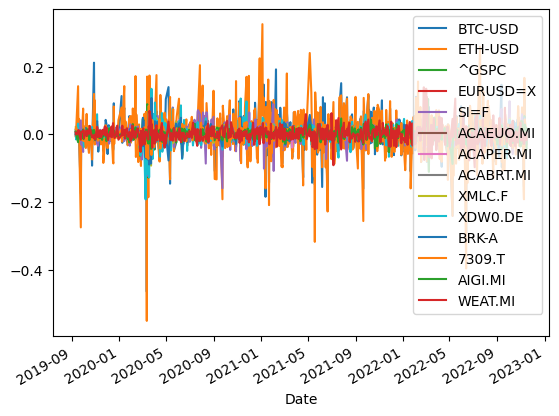

In [11]:
log_returns = np.log(data).diff().dropna()
log_returns.plot()

In [12]:
hurst_methods = [
    log_returns.apply(lambda x: hurst_exponent(x, method='DSOD')),
    log_returns.apply(lambda x: hurst_exponent(x, method='RS')),
    log_returns.apply(lambda x: hurst_exponent(x, method='DMA')),
    log_returns.apply(lambda x: nolds.hurst_rs(x)),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.binary_n(10000))),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.logarithmic_n(1, 100, 10)))
]
hurst_table_log = pd.concat(hurst_methods, axis=1)
hurst_table_log.columns = ['DSOD', 'RS', 'DMA', 'nolds.rs']#, "nolds.rs.binary_n", "nolds.rs.log_n"]
hurst_table_log

,DSOD,RS,DMA,nolds.rs
BTC-USD,-0.104613,0.315006,0.016323,0.478324
ETH-USD,-0.109055,0.332960,0.013439,0.521047
^GSPC,-0.363950,0.260236,0.011975,0.497143
EURUSD=X,-0.047385,0.264806,0.014209,0.530939
SI=F,-0.011332,0.298728,0.011775,0.503133
ACAEUO.MI,0.057030,0.353118,0.022808,0.681398
ACAPER.MI,-0.027218,0.357333,0.016233,0.654842
ACABRT.MI,0.007672,0.353183,0.022713,0.680219
XMLC.F,-0.001009,0.231166,0.012426,0.524379
XDW0.DE,0.076835,0.303282,0.013777,0.553010


In [13]:
hurst_table_log['nolds.rs'].sort_values()

7309.T       0.461749
BTC-USD      0.478324
^GSPC        0.497143
SI=F         0.503133
ETH-USD      0.521047
XMLC.F       0.524379
EURUSD=X     0.530939
BRK-A        0.532650
XDW0.DE      0.553010
AIGI.MI      0.556110
WEAT.MI      0.568057
ACAPER.MI    0.654842
ACABRT.MI    0.680219
ACAEUO.MI    0.681398
Name: nolds.rs, dtype: float64